파이토치 코딩 스타일

In [1]:
import numpy as np
import torch
np.array([1,2,3]), torch.tensor([1,2,3])

(array([1, 2, 3]), tensor([1, 2, 3]))

In [2]:
torch.tensor([1,2,3]) + torch.tensor([1,2,3]),   np.array([1,2,3])+np.array([1,2,3])

(tensor([2, 4, 6]), array([2, 4, 6]))

파이토치는 클래스 사용을 권고함
  - 신경망의 동작을 정의하는 모듈클래스와
  - 데이터셋을 다루는 데이터셋 클래스

In [3]:
import torch.nn as nn

In [11]:
# class Net(nn.Module):
#   def __init__(self, *args, **kwargs) -> None:
#     super().__init__(*args, **kwargs)
#     # 신경망 구성요소 정의
#   def forward(self, input)
#     # 신경망 동작 정의
#     # 함수 api방식
#     output = '' # 레이어들의 최종 결합
#     return output
#   def backward(self):
#     # 가중치 업데이트
#     pass

In [12]:
class Net(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    # 신경망 구성요소 정의
    self.layer1 = nn.Linear(10, 20)
    self.layer2 = nn.Linear(20, 10)

  def forward(self, input):
    # 신경망 동작 정의
    # 함수 api방식
    output = self.layer1(input)
    output = F.relu(output)
    output = self.layer2(output)
    return output

  def backward(self, grad_output):
    # 가중치 업데이트
    grad_input = self.layer2.backward(grad_output)
    grad_input = F.relu(grad_input)
    grad_input = self.layer1.backward(grad_input)
    return grad_input

In [5]:
class Dataset():
  def __init__(self) -> None:
    # 필요한 데이터 불러오기
    # readcsv, url.....
    pass
  def __len__(self):
    # 데이터의 개수 반환
    data = 0
    return len(data)
  def __getitem__(self, idx):
    # idx번째 입력 데이터와 idx번째 정답을 반환
    data,label = [],[]
    return data[idx], label[idx]

In [6]:
# 딥러닝학습
'''
for data, label in DataLoader():
  1. 모델의 예측값 계산
  predict = model(data)

  2. 손실함수를 이용해서 오차를 계산
  loss = LossFunction(predict,label)

  3. 오차 역전파
  loss.backward()

  4. 신경망 가중치 수정(업데이트)
  optimizer.step()
'''

'\nfor data, label in DataLoader():\n  1. 모델의 예측값 계산\n  predict = model(data)\n\n  2. 손실함수를 이용해서 오차를 계산\n  loss = LossFunction(predict,label)\n\n  3. 오차 역전파\n  loss.backward()\n\n  4. 신경망 가중치 수정(업데이트)\n  optimizer.step()\n'

평균 과 분산
   - 평균은 정규분포와 같이 종형 분포를 갖는 확률 분포에서 랜덤하게 데이터를 뽑았을때 평균에 가까운 값이 나올 확률이 가장 크다는 것을 의미
   - 데이터가 얼마나 퍼졌는지 나타내는 지표 , 분산이크면 평균에서 멀어지는 데이터가 많고 작으면 평균에 가까운 데이터가 많다는뜻  이때 분산의 양의 제곱근을 표준편차

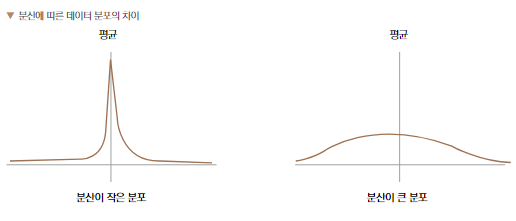

지곽적인 분석에 유용한 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from numpy.random.mtrand import randn
t = np.arange(0,5,0.2)
t2 = t**2
t3 = t**3

# mu를 평균, sigma를 표준편차로 하는 정규분포로부터 랜덤하게 값을 추출
mu,sigma = 100,15
x = mu + sigma*np.random.randn(10000)   # 표준 정규분포(평균0, 표준편차 1)

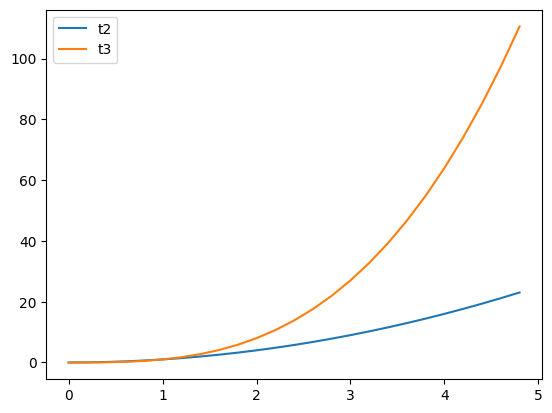

In [9]:
# 선형 그래프
plt.plot(t, t2, label="t2")
plt.plot(t, t3, label="t3")
plt.legend()
plt.show()

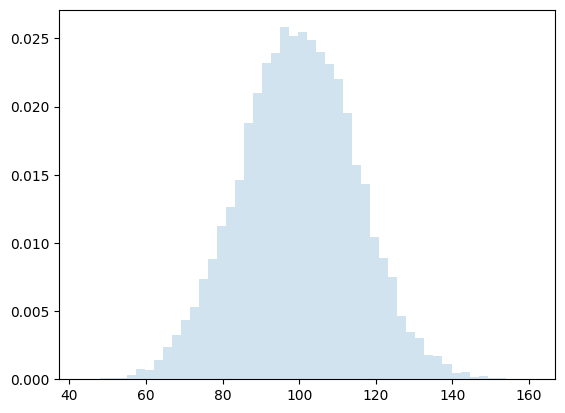

In [10]:
# 데이터의 분포 - 히스토그램
plt.hist(x,bins=50,density=True, alpha = 0.2)
plt.show()